In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import RandomizedSearchCV

np.set_printoptions(suppress=True) # Suppress scientific notation where possible

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

from mlxtend.plotting import plot_decision_regions
%matplotlib inline

# make prettier plots
%config InlineBackend.figure_format = 'svg' 

In [2]:
# to open pickled data

with open("MVP_patientlevel_intubation.pkl", 'rb') as picklefile: 
    patients = pickle.load(picklefile)

patients.head()

id  Age  Patient_Gender  Pneumonia  Pregnant  Indigenous  Diabetic  \
0  35483   50               0          1         0           0         0   
1   7062   25               1          0         0           0         0   
2  13779   29               1          0         0           0         0   
3  17334   30               0          0         0           0         0   
4   2789   64               0          0         0           0         1   

   COPD_Lung_Disease  Asthma  Immunosuppressed  Hypertension  Comorbidity  \
0                  0       0                 0             0            0   
1                  0       0                 0             0            0   
2                  0       0                 0             0            0   
3                  0       0                 0             0            0   
4                  0       0                 0             1            0   

   Cardiovascular_Disease  Obese  Chronic_Renal_Insufficiency  Intensive_Care  \
0                       0      0                            0               0   
1                       0      1                            0               0   
2                       0      0                            0               0   
3                       0      0                            0               0   
4                       0      1                            0               0   

   Intubation  
0           0  
1           0  
2           0  
3           0  
4           0

In [3]:
patients.columns

Index(['id', 'Age', 'Patient_Gender', 'Pneumonia', 'Pregnant', 'Indigenous',
       'Diabetic', 'COPD_Lung_Disease', 'Asthma', 'Immunosuppressed',
       'Hypertension', 'Comorbidity', 'Cardiovascular_Disease', 'Obese',
       'Chronic_Renal_Insufficiency', 'Intensive_Care', 'Intubation'],
      dtype='object')

In [4]:
patients = patients[['id', 'Age', 'Patient_Gender', 'Pneumonia', 'Pregnant', 'Indigenous',
       'Diabetic', 'COPD_Lung_Disease', 'Asthma', 'Immunosuppressed',
       'Hypertension', 'Comorbidity', 'Cardiovascular_Disease', 'Obese',
       'Chronic_Renal_Insufficiency', 'Intensive_Care', 'Intubation']]

In [5]:
patients.head()

id  Age  Patient_Gender  Pneumonia  Pregnant  Indigenous  Diabetic  \
0  35483   50               0          1         0           0         0   
1   7062   25               1          0         0           0         0   
2  13779   29               1          0         0           0         0   
3  17334   30               0          0         0           0         0   
4   2789   64               0          0         0           0         1   

   COPD_Lung_Disease  Asthma  Immunosuppressed  Hypertension  Comorbidity  \
0                  0       0                 0             0            0   
1                  0       0                 0             0            0   
2                  0       0                 0             0            0   
3                  0       0                 0             0            0   
4                  0       0                 0             1            0   

   Cardiovascular_Disease  Obese  Chronic_Renal_Insufficiency  Intensive_Care  \
0                       0      0                            0               0   
1                       0      1                            0               0   
2                       0      0                            0               0   
3                       0      0                            0               0   
4                       0      1                            0               0   

   Intubation  
0           0  
1           0  
2           0  
3           0  
4           0

In [6]:
patients.shape

(98820, 17)

In [7]:
sns.pairplot(patients.iloc[:, 1:])

Error in callback <function flush_figures at 0x7f92f9ce6ca0> (for post_execute):


KeyboardInterrupt: 

Train test split before any preprocessing or model building

In [14]:
X_train, X_test, y_train, y_test = train_test_split(patients.iloc[:, 1:-1], patients['Intubation'], \
                                                            test_size=0.3, random_state=42)

Scale continuous variables in training set and testing set separately

In [15]:
scaler = MinMaxScaler()
X_train["Age"] = scaler.fit_transform(X_train["Age"].values.astype(float).reshape(-1,1))

In [16]:
X_train.head()

Age  Patient_Gender  Pneumonia  Pregnant  Indigenous  Diabetic  \
32111  0.208333               1          0         0           0         0   
10923  0.608333               0          0         0           0         0   
14097  0.383333               0          1         0           0         1   
76580  0.300000               1          0         0           0         0   
50914  0.383333               1          0         0           0         0   

       COPD_Lung_Disease  Asthma  Immunosuppressed  Hypertension  Comorbidity  \
32111                  0       0                 0             0            0   
10923                  0       0                 0             0            0   
14097                  0       0                 0             1            0   
76580                  0       0                 0             0            0   
50914                  0       0                 0             0            1   

       Cardiovascular_Disease  Obese  Chronic_Renal_Insufficiency  \
32111                       0      0                            0   
10923                       0      0                            0   
14097                       0      0                            0   
76580                       0      0                            0   
50914                       0      1                            0   

       Intensive_Care  
32111               0  
10923               0  
14097               0  
76580               0  
50914               0

In [17]:
scaler = MinMaxScaler()
X_test["Age"] = scaler.fit_transform(X_test["Age"].values.astype(float).reshape(-1,1))

In [18]:
X_test.head()

Age  Patient_Gender  Pneumonia  Pregnant  Indigenous  Diabetic  \
73485  0.284314               1          0         0           0         0   
2783   0.676471               1          0         0           0         0   
13413  0.549020               0          0         0           0         1   
90433  0.450980               1          0         0           0         1   
11758  0.362745               0          0         0           0         0   

       COPD_Lung_Disease  Asthma  Immunosuppressed  Hypertension  Comorbidity  \
73485                  0       0                 0             0            0   
2783                   0       0                 0             1            0   
13413                  0       0                 0             1            0   
90433                  0       0                 0             0            0   
11758                  0       0                 0             0            0   

       Cardiovascular_Disease  Obese  Chronic_Renal_Insufficiency  \
73485                       0      0                            0   
2783                        0      0                            0   
13413                       0      0                            0   
90433                       0      0                            0   
11758                       0      1                            0   

       Intensive_Care  
73485               0  
2783                0  
13413               0  
90433               0  
11758               0

In [19]:
# We'll go straight to a robust classifier to show even they are prone to the metric trap
# takes ~ 1 min to run
clf = XGBClassifier().fit(X_train, y_train)

/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:21:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [20]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {round(accuracy, 4)*100}')

Model Accuracy: 97.74000000000001


In [21]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

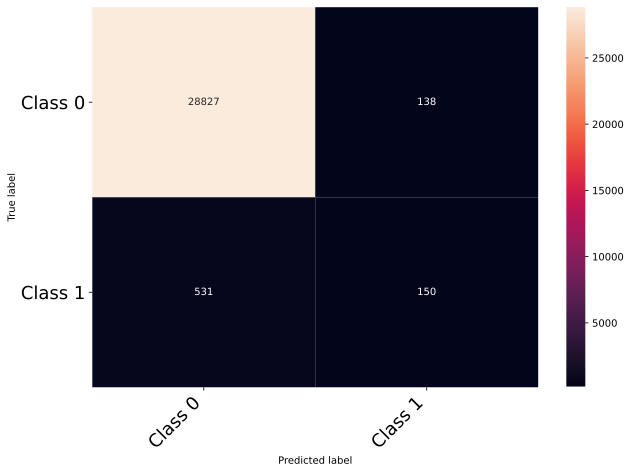

In [22]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

Improve balance using random oversampling of the minority class

In [23]:
# Now add some random oversampling of the minority classes
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=0)
X = patients.iloc[:, 1:-1]
y = patients['Intubation']
X_resampled, y_resampled = ros.fit_sample(X, y)

In [24]:
# confirm target class is now balanced

Counter(y_resampled)

Counter({0: 96726, 1: 96726})

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, \
                                                            test_size=0.3, random_state=42)

In [26]:
scaler = MinMaxScaler()
X_train["Age"] = scaler.fit_transform(X_train["Age"].values.astype(float).reshape(-1,1))

<ipython-input-26-909bd7e59f49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Age"] = scaler.fit_transform(X_train["Age"].values.astype(float).reshape(-1,1))


In [27]:
X_test["Age"] = scaler.fit_transform(X_test["Age"].values.astype(float).reshape(-1,1))

<ipython-input-27-96beb5406f99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Age"] = scaler.fit_transform(X_test["Age"].values.astype(float).reshape(-1,1))


In [28]:
clf_ros = XGBClassifier().fit(X_train, y_train)

/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:22:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [29]:
y_pred = clf_ros.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {round(accuracy, 4)*100}')

Model Accuracy: 81.65


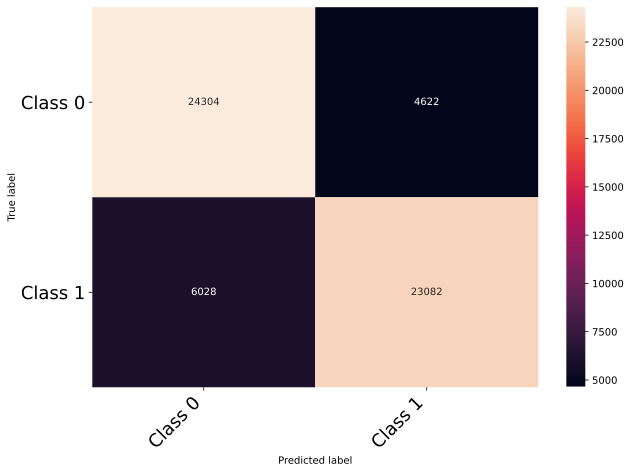

In [30]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

In [31]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, clf_ros.predict_proba(X_test)[:,1])

ROC AUC score =  0.9050836451312181


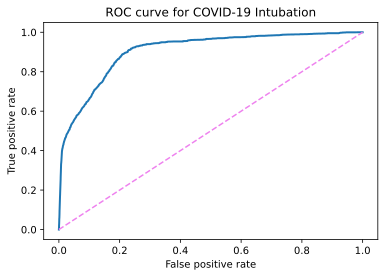

In [32]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for COVID-19 Intubation');
print("ROC AUC score = ", roc_auc_score(y_test, clf_ros.predict_proba(X_test)[:,1]))
plt.savefig("ROC_resampling xgboost_baseline")

In [34]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8125462034005704

Now try using smote

In [42]:
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(X,y)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_smoted, y_smoted, \
                                                            test_size=0.3, random_state=42)

In [44]:
scaler = MinMaxScaler()
X_train["Age"] = scaler.fit_transform(X_train["Age"].values.astype(float).reshape(-1,1))

<ipython-input-44-909bd7e59f49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Age"] = scaler.fit_transform(X_train["Age"].values.astype(float).reshape(-1,1))


In [45]:
scaler = MinMaxScaler()
X_test["Age"] = scaler.fit_transform(X_test["Age"].values.astype(float).reshape(-1,1))

<ipython-input-45-da80e7a24e32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Age"] = scaler.fit_transform(X_test["Age"].values.astype(float).reshape(-1,1))


In [46]:
Counter(y_smoted)

Counter({0: 96726, 1: 96726})

In [52]:
clf_smote = XGBClassifier().fit(X_train, y_train)

/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:15:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [54]:
print("The score for xgBoost_Smote is")
print("Training: {:6.2f}%".format(100*clf_smote.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*clf_smote.score(X_test, y_test)))

The score for xgBoost_Smote is
Training:  90.30%
Test set:  83.48%


In [55]:
y_pred = clf_smote.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {round(accuracy, 4)*100}')

Model Accuracy: 83.48


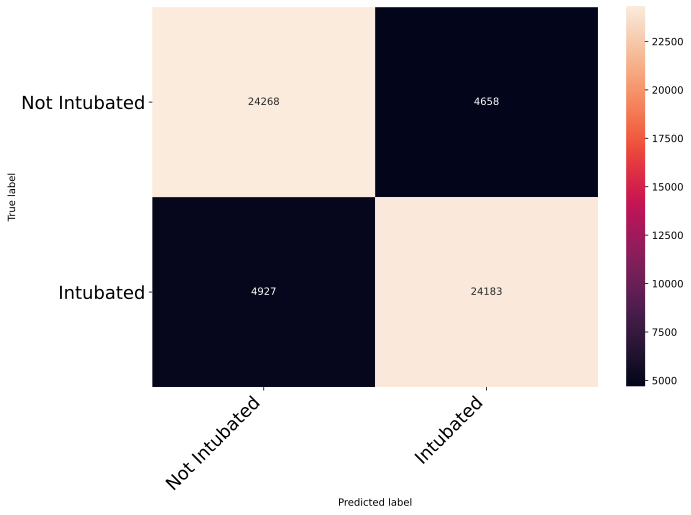

In [56]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['Not Intubated', 'Intubated'])

In [57]:
from sklearn.metrics import f1_score

# Or we can just ask sklearn
f1_score(y_test, y_pred)

0.834601646218357

In [58]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, clf_smote.predict_proba(X_test)[:,1])

ROC AUC score =  0.9071543348521999


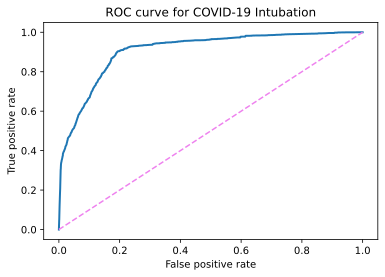

In [59]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for COVID-19 Intubation');
print("ROC AUC score = ", roc_auc_score(y_test, clf_smote.predict_proba(X_test)[:,1]))
plt.savefig("ROC_xgb smote_baseline")

Build baseline model using KNN

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, label_train)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, label_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, label_test)))

The score for kNN is
Training:  98.23%
Test set:  97.77%


In [39]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train, label_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, label_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, label_test)))

The score for logistic regression is
Training:  97.96%
Test set:  97.88%



Unlike kNN, the logistic regression model has a probabiltiy method built into it. Let's look at the predicted probabilities for the first few observations.

In [42]:
X_test[:5]

Age  Patient_Gender  Pneumonia  Pregnant  Indigenous  Diabetic  \
81905  0.380531               0          0         0           0         0   
27315  0.619469               0          1         0           0         0   
94552  0.318584               1          0         0           0         0   
46146  0.495575               0          0         0           0         0   
33100  0.433628               0          1         0           0         0   

       COPD_Lung_Disease  Asthma  Immunosuppressed  Hypertension  Comorbidity  \
81905                  1       0                 0             0            0   
27315                  0       0                 0             0            0   
94552                  0       0                 0             0            0   
46146                  0       0                 0             1            0   
33100                  0       0                 0             0            0   

       Cardiovascular_Disease  Obese  Chronic_Renal_Insufficiency  \
81905                       0      1                            0   
27315                       0      0                            0   
94552                       0      0                            0   
46146                       0      1                            0   
33100                       0      1                            0   

       Intensive_Care  
81905               0  
27315               0  
94552               0  
46146               0  
33100               0


Let's look at the type of errors that these two classifiers made:

In [46]:
print("kNN confusion matrix: \n\n", confusion_matrix(label_test, knn.predict(X_test)))

kNN confusion matrix: 

 [[28853   140]
 [  520   133]]


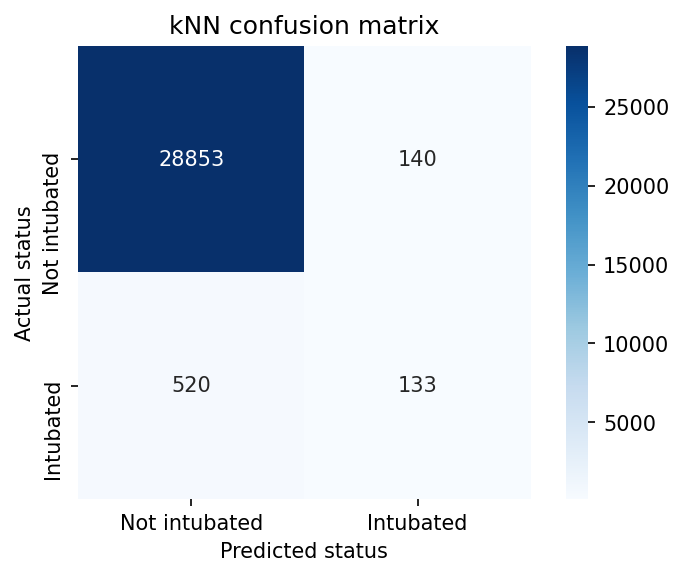

In [56]:
# Print confusion matrix for kNN
knn_confusion = confusion_matrix(label_test, knn.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt=".0f",
           xticklabels=["Not intubated", "Intubated"],
           yticklabels=["Not intubated", "Intubated"])

plt.xlabel('Predicted status')
plt.ylabel('Actual status')
plt.title('kNN confusion matrix');

kNN Confusion Matrix interpretation:
* Correctly predicted Not Intubated (True Negatives) = 28853
* Incorrectly predicted Not Intubated (False Negatives) = 520
* Incorrectly predicted Intubated (False Positives) = 140
* Correctly predicted Intubated (True Positives) = 133

In [59]:
# using classification_report metric on kNN
from sklearn.metrics import classification_report
y_true = label_test
y_pred = knn.predict(X_test)
target_names = ['Not Intubated', 'Intubated']
print(classification_report(y_true, y_pred, target_names=target_names))

               precision    recall  f1-score   support

Not Intubated       0.98      1.00      0.99     28993
    Intubated       0.49      0.20      0.29       653

     accuracy                           0.98     29646
    macro avg       0.73      0.60      0.64     29646
 weighted avg       0.97      0.98      0.97     29646



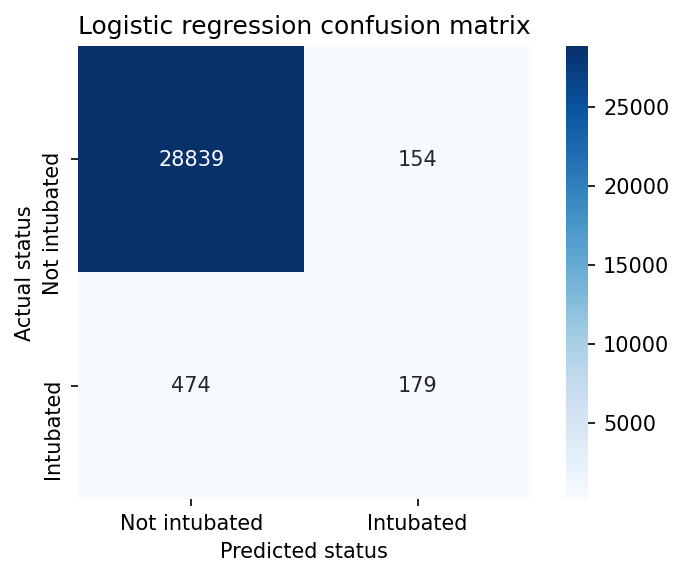

In [57]:
# Print confusion matrix for logistic regression
logit_confusion = confusion_matrix(label_test, logit.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt=".0f",
           xticklabels=["Not intubated", "Intubated"],
           yticklabels=["Not intubated", "Intubated"])

plt.xlabel('Predicted status')
plt.ylabel('Actual status')
plt.title('Logistic regression confusion matrix');

plt.savefig("confusion_matrix_logit_baseline")

logit Confusion Matrix interpretation:
* Correctly predicted Not Intubated (True Negatives) = 28839
* Incorrectly predicted Not Intubated (False Negatives) = 474
* Incorrectly predicted Intubated (False Positives) = 154
* Correctly predicted Intubated (True Positives) = 179

In [62]:
# using classification_report metric on logit
from sklearn.metrics import classification_report
y_true = label_test
y_pred = logit.predict(X_test)
target_names = ['Not Intubated', 'Intubated']
print(classification_report(y_true, y_pred, target_names=target_names))

               precision    recall  f1-score   support

Not Intubated       0.98      0.99      0.99     28993
    Intubated       0.54      0.27      0.36       653

     accuracy                           0.98     29646
    macro avg       0.76      0.63      0.68     29646
 weighted avg       0.97      0.98      0.98     29646



Examine distribution of intubated to not intubated cases and understand why accuracy is not a useful metric in our case

In [65]:
patients.Intubation.value_counts()

0    96726
1     2094
Name: Intubation, dtype: int64

In [66]:
96726/(96726 + 2094)

0.9788099574984821

Highly imbalanced. If we always predict Not Intubated, we will be right 96726/(96726 + 2094) = 97.88% of the time!

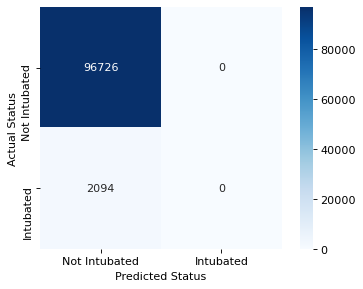

In [68]:
predictions = [0]*len(patients) # predict everything as class 0!

patients_confusion = confusion_matrix(patients.Intubation, predictions)
plt.figure(dpi=80)
sns.heatmap(patients_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Intubated', 'Intubated'],
           yticklabels=['Not Intubated', 'Intubated']);
plt.xlabel('Predicted Status')
plt.ylabel('Actual Status');

Let's make a slightly better model using logistic regression since it scored better than kNN above. Must take into account class imbalance and use case, shoot for better recall

In [69]:
lm = LogisticRegression(C = 100)
lm.fit(X_train, label_train)
print("Logistic score: {:6.4f}".format(lm.score(X_train,label_train)))

Logistic score: 0.9796


In [73]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict Intubated if probability of being Intubated is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    patients_confusion = confusion_matrix(label_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(patients_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Intubated', 'Intubated'],
           yticklabels=['Not Intubated', 'Intubated']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    
    # print classification report 
    target_names = ['Not Intubated', 'Intubated']
    print(classification_report(label_test, y_predict, target_names=target_names))

               precision    recall  f1-score   support

Not Intubated       0.98      0.99      0.99     28993
    Intubated       0.53      0.28      0.37       653

     accuracy                           0.98     29646
    macro avg       0.76      0.64      0.68     29646
 weighted avg       0.97      0.98      0.98     29646



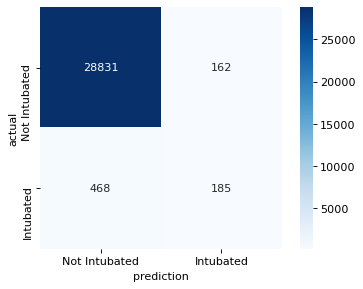

In [74]:
make_confusion_matrix(lm)

In [75]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(lm, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_claâ€¦

Interpreting changing threshold in confusion matrix: In our case, we want to minimize the number of False Negatives (those we predicted as Not Needing Intubated but who actually were Intubated). In other words, we want to increase our Recall to be more balanced with our Precision. By reducing our probability threshold to 6% before we label a patient as needing Intubation, we correctly identified more patients who needed Intubation (increased Recall: 360 vs 185 at 50% threshold), but we also predicted significantly more patients would need Intubation who didn't (lowered Precision: 1056 vs 162 at 50% threshold).

Precision-Recall Tradeoff: decreasing the threshold increases recall but decreases precision. Which is worse in our case? There are costs associated with incorrectly predicting whether someone will need a ventilator (low recall = shortage of ventilators, lack of patient care, lack of resources, more deaths?) and over predicting the number of ventilators needed (wasted resources, significantly higher costs for hospital or care provider, taking ventilators from limited supply)

In [79]:
# using the default threshold of 0.5, which is what vanilla predict does
label_predict = lm.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_test, label_predict), 
                                                     recall_score(label_test, label_predict)))

Default threshold:
Precision: 0.5331,   Recall: 0.2833


In [80]:
# using the new threshold of 0.06
label_predict = (lm.predict_proba(X_test)[:,1] > 0.06)
print("Threshold of 0.06:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_test, label_predict), 
                                                     recall_score(label_test, label_predict)))

Threshold of 0.06:
Precision: 0.2542,   Recall: 0.5513


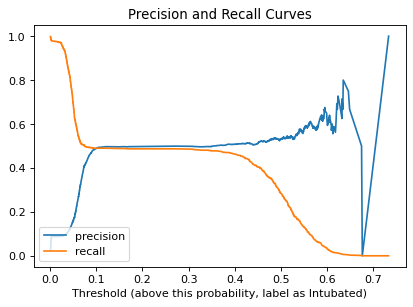

In [82]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 
from sklearn.metrics import precision_recall_curve

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_test, lm.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as Intubated)');
plt.title('Precision and Recall Curves');

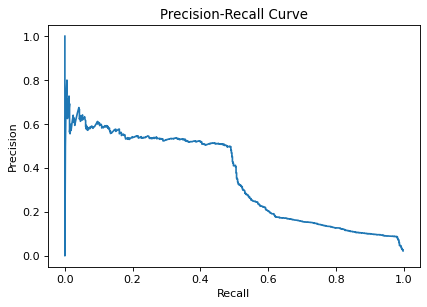

In [83]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

Look at f1 score to find right balance between precision and recall

In [86]:
from sklearn.metrics import f1_score

# Or we can just ask sklearn
label_predict = lm.predict(X_test)
f1_score(label_test, label_predict)

0.37000000000000005

In [87]:
# What about the threshold of 0.06?
label_predict = (lm.predict_proba(X_test)[:, 1] > 0.06)
f1_score(label_test, label_predict)

0.34799420009666504

The ROC Curve

In [88]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(label_test, lm.predict_proba(X_test)[:,1])

ROC AUC score =  0.9347553079427897


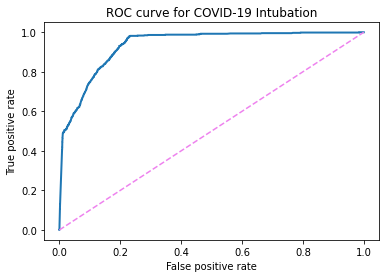

In [93]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for COVID-19 Intubation');
print("ROC AUC score = ", roc_auc_score(label_test, lm.predict_proba(X_test)[:,1]))
plt.savefig("ROC_logit_baseline")

In [90]:
from sklearn.metrics import log_loss

print("Log-loss on logit: {:6.4f}".format(log_loss(label_test, lm.predict_proba(X_test))))

Log-loss on logit: 0.0622


In [91]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier()
dc.fit(X_train, label_train)
print("Log-loss on dummy classifier: {:6.4f}".format(log_loss(label_test, dc.predict_proba(X_test))))

Log-loss on dummy classifier: 0.1059


In [94]:
print("Logistic accuracy: {:6.4f}".format(lm.score(X_test, label_test)))
print("Dummy accuracy: {:6.4f}".format(dc.score(X_test, label_test)))

Logistic accuracy: 0.9787
Dummy accuracy: 0.9780


Examining other models